In [2]:
import pandas as pd
import os
from dotenv import load_dotenv
import nltk
import re
import string
nltk.download('punkt') 
load_dotenv()
home_path = os.getenv('LOCAL_ENV')
google_reviews = pd.read_csv(home_path + 'data/processed/aspect_classification_data/processed_google_reviews.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[nltk_data] Downloading package punkt to /Users/mylene/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We want to analyse at the sentence level so what we will do is:
1. count the amount of sentences per review.
2. split the reviews in the sentence count column that have more than one sentence.
3. count the amount of words in each review sentence.
4. remove reviews that are less than 5 words.
5. create a pattern for the fuzzy matcher 
6. get the synonyms for the words in that matcher



In [3]:
google_reviews["Sentence Count"] = google_reviews["Text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [88]:
google_reviews

,Unnamed: 0,Name,Sentiment,Text,Sentence Count
0,0,Ellis,positive,"It was a bit quite when we went in, but don’t let that fool you if it’s ever the case! After a little while the place was cozily busy. Rightfully so! The burgers (and nachos) were lovely, as was the staff. I would definitely recommend this place if you’re around and in the need of a good burger.",5
1,1,Ellis,positive,Nice cozy place which serves very tasty burgers! The staff is friendly and you are served pretty quickly. They have a good selection of burgers and other goodies. The best thing is you can even get a gluten-free bun for no additional cost. …,5
2,2,Ellis,positive,Really nice place. One of my favourite burger joints whole visiting Amsterdam. Reasonably priced and good quality food. 40euros for 2 burgers and 2 drinks,4
3,3,Ellis,negative,"The Service was quite good but the burgers we ordered were small for the price we paid for. The classic burger was okay but a bit too cold. The Portobello burger says ""grilled vegetables"" but it had almost no vegetables on it. The Burger …",4
4,4,Ellis,positive,I had a very nice experience! The staff were really nice and were kind to switch the buns for iceberg lettuce (making it Keto friendly). Would highly recommend if looking for a keto friendly place in Amsterdam.,3
...,...,...,...,...,...
399718,575747,Amstelhoeck,positive,In a word super\n\n\nEn un mot super,1
399719,575748,Amstelhoeck,negative,Recommended\n\n\nEmpfehlenswert,1
399720,575749,Amstelhoeck,positive,Location location location\n\n\nLokatie lokatie lokatie,1
399721,575750,Amstelhoeck,negative,Nice moment\n\n\nNice moment,1


split the reviews in the sentence count column that have more than one sentence.

In [4]:
# Custom tokenization pattern excluding certain punctuation marks
pattern = r'\b\w+\b|[' + re.escape(string.punctuation.replace('.', '')) + '](?<!\.)'

# split the google reviews 
split_google_reviews = google_reviews.copy()
split_google_reviews['Sentences'] = split_google_reviews['Text'].apply(nltk.sent_tokenize)
split_google_reviews = split_google_reviews.explode('Sentences').reset_index(drop=True)


In [5]:
# Count words with custom tokenization pattern
split_google_reviews['Word Count'] = split_google_reviews['Sentences'].apply(lambda x: len(nltk.regexp_tokenize(x, pattern)))

In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
# Assign unique numeric ID to each review
split_google_reviews['Review ID'] = split_google_reviews.groupby('Sentences').ngroup()

split_google_reviews = split_google_reviews[split_google_reviews['Sentence Count'] > 1]

In [8]:
# Filter out sentences with less than 5 words
split_google_reviews = split_google_reviews[split_google_reviews['Word Count'] >= 5]

In [9]:
split_google_reviews

,Unnamed: 0,Name,Sentiment,Text,Sentence Count,Sentences,Word Count,Review ID
0,0,Ellis,positive,"It was a bit quite when we went in, but don’t let that fool you if it’s ever the case! After a little while the place was cozily busy. Rightfully so! The burgers (and nachos) were lovely, as was the staff. I would definitely recommend this place if you’re around and in the need of a good burger.",5,"It was a bit quite when we went in, but don’t let that fool you if it’s ever the case!",24,360688
1,0,Ellis,positive,"It was a bit quite when we went in, but don’t let that fool you if it’s ever the case! After a little while the place was cozily busy. Rightfully so! The burgers (and nachos) were lovely, as was the staff. I would definitely recommend this place if you’re around and in the need of a good burger.",5,After a little while the place was cozily busy.,9,152807
3,0,Ellis,positive,"It was a bit quite when we went in, but don’t let that fool you if it’s ever the case! After a little while the place was cozily busy. Rightfully so! The burgers (and nachos) were lovely, as was the staff. I would definitely recommend this place if you’re around and in the need of a good burger.",5,"The burgers (and nachos) were lovely, as was the staff.",13,501320
4,0,Ellis,positive,"It was a bit quite when we went in, but don’t let that fool you if it’s ever the case! After a little while the place was cozily busy. Rightfully so! The burgers (and nachos) were lovely, as was the staff. I would definitely recommend this place if you’re around and in the need of a good burger.",5,I would definitely recommend this place if you’re around and in the need of a good burger.,18,342036
5,1,Ellis,positive,Nice cozy place which serves very tasty burgers! The staff is friendly and you are served pretty quickly. They have a good selection of burgers and other goodies. The best thing is you can even get a gluten-free bun for no additional cost. …,5,Nice cozy place which serves very tasty burgers!,9,402895
...,...,...,...,...,...,...,...,...
894092,575689,Amstelhoeck,positive,Located next to the Stopera on the Amstel.\n\n …,2,Located next to the Stopera on the Amstel.,8,65897
894111,575707,Amstelhoeck,negative,To say the least so-so!\n\n\nМягко говоря так себе!,2,To say the least so-so!,8,109168
894112,575707,Amstelhoeck,negative,To say the least so-so!\n\n\nМягко говоря так себе!,2,Мягко говоря так себе!,5,644131
894113,575708,Amstelhoeck,positive,It is advisable to reserve a table.\n\n …,2,It is advisable to reserve a table.,7,62105


In [10]:
import nltk
import spacy
from spacy.util import filter_spans
from spaczz.matcher import FuzzyMatcher
from spacy import matcher
from spacy.tokens import Doc
from nltk.corpus import wordnet
from spacy.tokens import Span


In [11]:
nlp = spacy.blank("en")
matcher = FuzzyMatcher(nlp.vocab)

Use the Fuzzy matcher from spaczz and phrase matcher to look for the synonyms related to my previous regex expressipn.

In [12]:
#'breakfast', 'lunch', 'dinner', 'alcohol'
word_patterns = ['food', 'drink', 'lunch', 'breakfast', 'dinner', 'alcohol', 'beer', 'wine','pancakes', 'drink', 'desserts', 'gin', 'wine', 'breakfast', 'lunch', 'pasta',
                 'vegeterian', 'vegan', 'burgers', 'pasta', 'dish', 'beer', 'pizza', 'taste',
                 'food', 'cocktail', 'coffee', 'menu', 'tasty', 'delicious', 'staff', 'host',
                 'ambience', 'atmosphere', 'cozy', 'gezellig', 'service', 'pricey', 'cheap',
                 'nice place', 'great place', 'amazing place', 'good place', 'bad place',
                 'terrible place', 'great experience', 'chicken', 'burger', 'atmosphere']


In [13]:
def get_synonyms(word):
    synonyms = []
    synsets = wordnet.synsets(word)
    for synset in synsets:
        for lemma in synset.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))

In [14]:
def has_synset(word):
    synsets = wordnet.synsets(word)
    return len(synsets) > 0

In [15]:
patterns = []
for word in word_patterns:
    synonyms = get_synonyms(word)
    pattern = nlp(" ".join([word] + synonyms))
    patterns.extend(map(lambda x: nlp(x), [word] + synonyms))


In [16]:
fuzzy_matcher = FuzzyMatcher(nlp.vocab)
fuzzy_matcher.add("FOOD_PATTERN", patterns)

In [17]:
@spacy.Language.component("filter_noisy_tokens")
def filter_noisy_tokens(doc):
    noisy_tokens = []
    matches = fuzzy_matcher(doc)
    spans = [Span(doc, start, end) for _, start, end, _, _ in matches]
    filtered_spans = filter_spans(spans)

    with doc.retokenize() as retokenizer:
        for span in filtered_spans:
            retokenizer.merge(span)

    for span in filtered_spans:
        noisy_tokens.extend(range(span.start, span.end))

    words = [token.text for token in doc if token.i not in noisy_tokens]
    doc = Doc(doc.vocab, words=words)

    return doc



In [18]:
# Register max_token_index as an extension
Doc.set_extension("max_token_index", default=-1, force=True)

In [19]:
nlp.add_pipe("filter_noisy_tokens", last=True)



<function __main__.filter_noisy_tokens(doc)>

In [22]:
# clean_reviews = []
# max_token_index = -1  # Initialize max_token_index

# for _, row in split_google_reviews.iterrows():
#     text = row['Sentences']
#     doc = nlp(text)

#     # Check if the document has any tokens after noise filtering
#     if len(doc) > 0:
#         # Ensure that doc._.max_token_index is a valid index before comparing it to max_token_index
#         if doc._.max_token_index < len(doc):
#             max_token_index = max(max_token_index, doc._.max_token_index)
#             clean_reviews.append(row)

# clean_split_google_reviews = pd.DataFrame(clean_reviews)

noisy_reviews = []

for _, row in split_google_reviews.iterrows():
    text = row['Sentences']
    doc = nlp(text)

    # Check if any matches were detected in the document
    if len(fuzzy_matcher(doc)) > 0:
        noisy_reviews.append(row)

noisy_split_google_reviews = pd.DataFrame(noisy_reviews)

# Drop noisy rows from original dataframe
clean_split_google_reviews = split_google_reviews.drop(noisy_split_google_reviews.index)



In [ ]:
#clean_split_google_reviews.to_excel(home_path+'data/processed/aspect_classification_data/sample.xlsx')

In [23]:
aspects_patterns = ['width','space','entrance','Wheelchair', 'Access', 'Staff', 'Toilets', 'Transport & Parking', 'Overview', 'Noise levels']

synonyms = {word: get_synonyms(word) for word in aspects_patterns}

# Create a set of all your keywords and their synonyms for efficient lookup
keywords = set(aspects_patterns)
for word, synonym_list in synonyms.items():
    for synonym in synonym_list:
        keywords.add(synonym)

# Define a function to check if a review contains any keyword
def contains_keyword(review):
    return any(keyword in review for keyword in keywords)

# Create patterns with both the word and its synonyms
synonym_aspect_patterns = [nlp(word) for word in keywords]

# Add patterns to the fuzzy matcher
fuzzy_matcher.add("RELEVANT_PATTERN", synonym_aspect_patterns)


In [99]:
sentences = clean_split_google_reviews['Sentences'].tolist()
batch_size = 4739  # Adjust the batch size as needed

real_relevant_reviews = []
for i in range(0, len(sentences), batch_size):
    batch = sentences[i:i+batch_size]
    docs = [nlp(text) for text in batch]
    for j, doc in enumerate(docs):
        matches = fuzzy_matcher(doc)
        if len(matches) > 0:
            row_index = i + j  # Calculate the index of the current doc in the original dataframe
            row = split_google_reviews.iloc[row_index]
            real_relevant_reviews.append(row)

real_relevant_split_google_reviews = pd.DataFrame(real_relevant_reviews)



In [26]:
real_relevant_split_google_reviews

,Unnamed: 0,Name,Sentiment,Text,Sentence Count,Sentences,Word Count,Review ID
332,233,Samar,positive,"Philippines Secret Vacation Hideaway..Beautiful Beaches,Mountains..Fun Zip Lines! Most of All Beautiful People...",2,Most of All Beautiful People...,5,391760
539,398,Samar,positive,"Third largest island in the Philippines ... please do not expect the luxury standard of a big city, power cuts can occur at any time. Telephone connection sufficient, Internet however under all dignity ... in the …",2,"Third largest island in the Philippines ... please do not expect the luxury standard of a big city, power cuts can occur at any time.",25,108087
571,724,House of Watt,positive,Nice ambience with almost all facilities . Super clean. It's perfect for doing office work. This place has chilling vibes . Staff is friendly.,5,It's perfect for doing office work.,8,366168
639,746,House of Watt,positive,"Good atmosphere and nice drinks.\nThey have weekly evenings (table games, activities...) with dutch tematic.\nVerey enjoyable and perfect for afterwork",3,Verey enjoyable and perfect for afterwork,6,576604
837,825,House of Watt,positive,"Great place to meet. Dishes are simple and good. Definitely recommended, but not 5 stars. …",4,Dishes are simple and good.,5,226522
...,...,...,...,...,...,...,...,...
853996,551358,Vascobelo,positive,"Nice coffee, very nice staff.. and great to be spoiled (on a rainy day)\nWith a warm croissant..this lady offered herself, BE APPRECIATED!!🙂 …",2,"Nice coffee, very nice staff.. and great to be spoiled (on a rainy day)\nWith a warm croissant..this lady offered herself, BE APPRECIATED!",29,72061
855044,552175,Long Pura,negative,"This place is terrible to my taste . Servers are nice, but poor service . Food was terrible . We didn’t even finish the food . We ordered rice plates . And had to order just fried rice since the rice plates were bad . And talk About the …",7,"Servers are nice, but poor service .",7,461832
855125,552202,Long Pura,negative,"We went to this resturant for dinner, the service was nice and friendly but the food was NOT good at all! No test in meat or chicken or rice!",2,No test in meat or chicken or rice!,9,414618
856570,552993,Whiskycaf√© L&B,positive,AMAZING! Take a nice camera because it's a photographer's dream. Enjoy.,3,Take a nice camera because it's a photographer's dream.,13,487011


In [27]:
def contains_keyword(review):
    return any(keyword in review for keyword in keywords)

real_relevant_split_google_reviews['relevant'] = real_relevant_split_google_reviews['Sentences'].apply(contains_keyword)


In [80]:
len(split_google_reviews)

483998

In [28]:
split_google_reviews['relevant'] = split_google_reviews['Sentences'].apply(contains_keyword)

In [ ]:
real_relevant_split_google_reviews

In [81]:
true_count = split_google_reviews['relevant'].value_counts()[True]

In [84]:
false_count = split_google_reviews['relevant'].value_counts()[False]

In [74]:
false_count_df = pd.DataFrame({'False Count': [false_count]})

In [85]:
print(true_count, false_count)

105162 378836


In [86]:
test = pd.read_csv(home_path+'data/processed/aspect_classification_data/processed_euans_reviews.csv')

In [87]:
test

,Unnamed: 0,Aspect,Rating,Text,Venue,SentenceCount,Sentiment
0,0,Overview,5.0,"Dobbies garden center has a large range of items including clothes (Mainly for more elderly people), food , garden furniture and accessories and even fish!",dobbies garden centre perth,1,positive
1,1,Transport & Parking,5.0,"There is disabled parking close to the doors, there is a lift up to the clothes department and everywhere is flat with minimal bumps. There is a bus to Dobbies from Perth.",dobbies garden centre perth,2,positive
2,2,Access,5.0,There is a lift and there is also a cafe where you could take a rest if you got tired and the food is also very yummy! There are no stairs without a lift and the ground is very flat.,dobbies garden centre perth,2,positive
3,6,Overview,4.5,"Fantastic spot with great cocktails, friendly staff and wheelchair accessibility,",bow lane dublin,1,positive
4,7,Transport & Parking,4.5,"A ten minute walk from the luas, not much nearby parking.",bow lane dublin,1,positive
...,...,...,...,...,...,...,...
36953,56589,Access,5.0,"There's a wheelchair ramp to the left of the main entrance, another ramp down into the atrium and from the atrium a lift to all floors. The displays are well spaced out and easy to navigate.",wien museum karlsplatz vienna,2,positive
36954,56591,Staff,5.0,Friendly and helpful. One staff member saw us heading for the accessible toilet and rushed across to open the doors for us.,wien museum karlsplatz vienna,2,positive
36955,56593,Overview,5.0,Friendly and helpful staff who examined how the hoist works to help people into the pool. Lovely and warm pool at 30 degrees making for a relaxing swim.,kirkcudbright swimming pool kirkcudbright,2,positive
36956,56594,Transport & Parking,5.0,Spaces located by the door and clearly signed for blue badge holders.,kirkcudbright swimming pool kirkcudbright,1,positive


In [33]:
real_relevant_split_google_reviews.to_excel(home_path+'data/processed/aspect_classification_data/new_sample2.xlsx')

In [34]:
# Filter reviews to only include those that contain a keyword
relevant_reviews = []
for _, row in split_google_reviews.iterrows():
    if contains_keyword(row['Sentences']):
        relevant_reviews.append(row)
relevant_split_google_reviews = pd.DataFrame(relevant_reviews)

In [35]:
relevant_split_google_reviews['relevant'] = relevant_split_google_reviews['Sentences'].apply(contains_keyword)

In [37]:
%pip install top2vec[sentence_encoders]

zsh:1: no matches found: top2vec[sentence_encoders]
Note: you may need to restart the kernel to use updated packages.


In [41]:
from top2vec import Top2Vec
documents = relevant_split_google_reviews['Sentences'].to_list()
model = Top2Vec(documents)

2023-06-01 13:23:48,057 - top2vec - INFO - Pre-processing documents for training
2023-06-01 13:23:51,752 - top2vec - INFO - Creating joint document/word embedding
2023-06-01 13:26:04,080 - top2vec - INFO - Creating lower dimension embedding of documents


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-06-01 13:26:51,428 - top2vec - INFO - Finding dense areas of documents


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-06-01 13:26:56,707 - top2vec - INFO - Finding topics


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [42]:
topics = model.get_topics(num_topics=10)

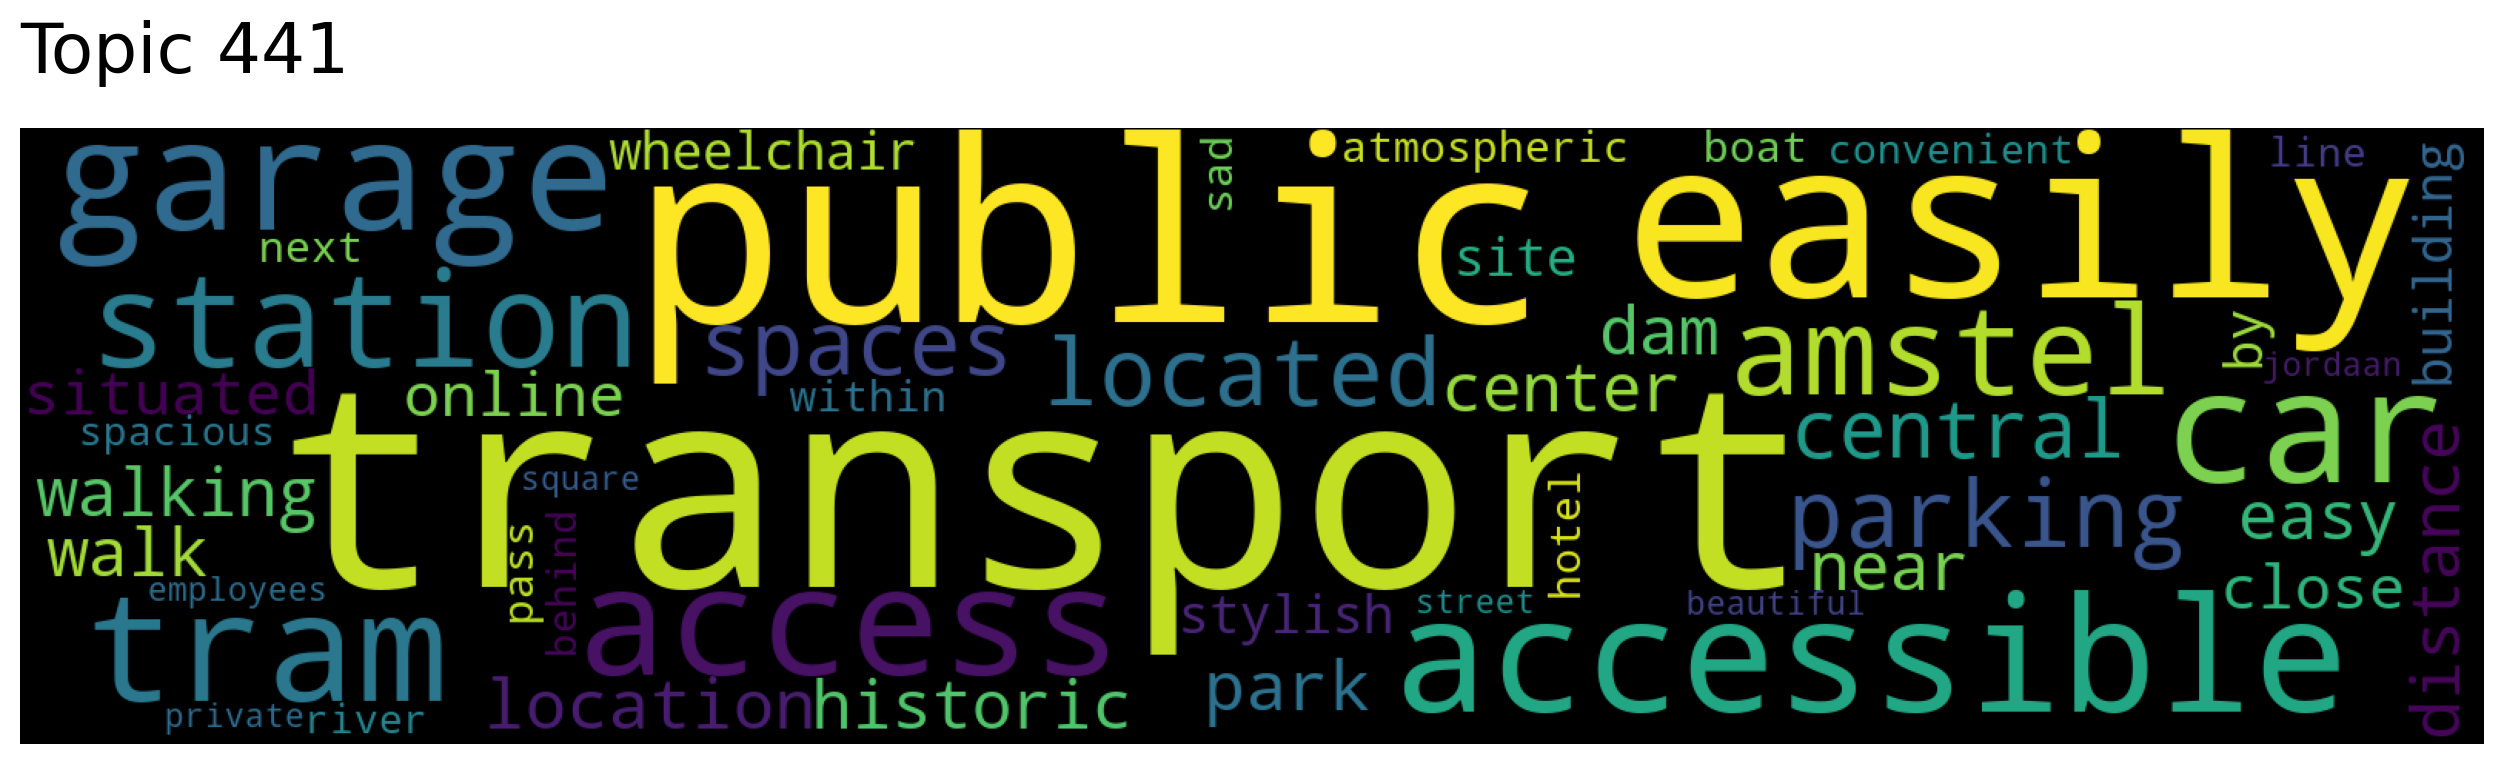

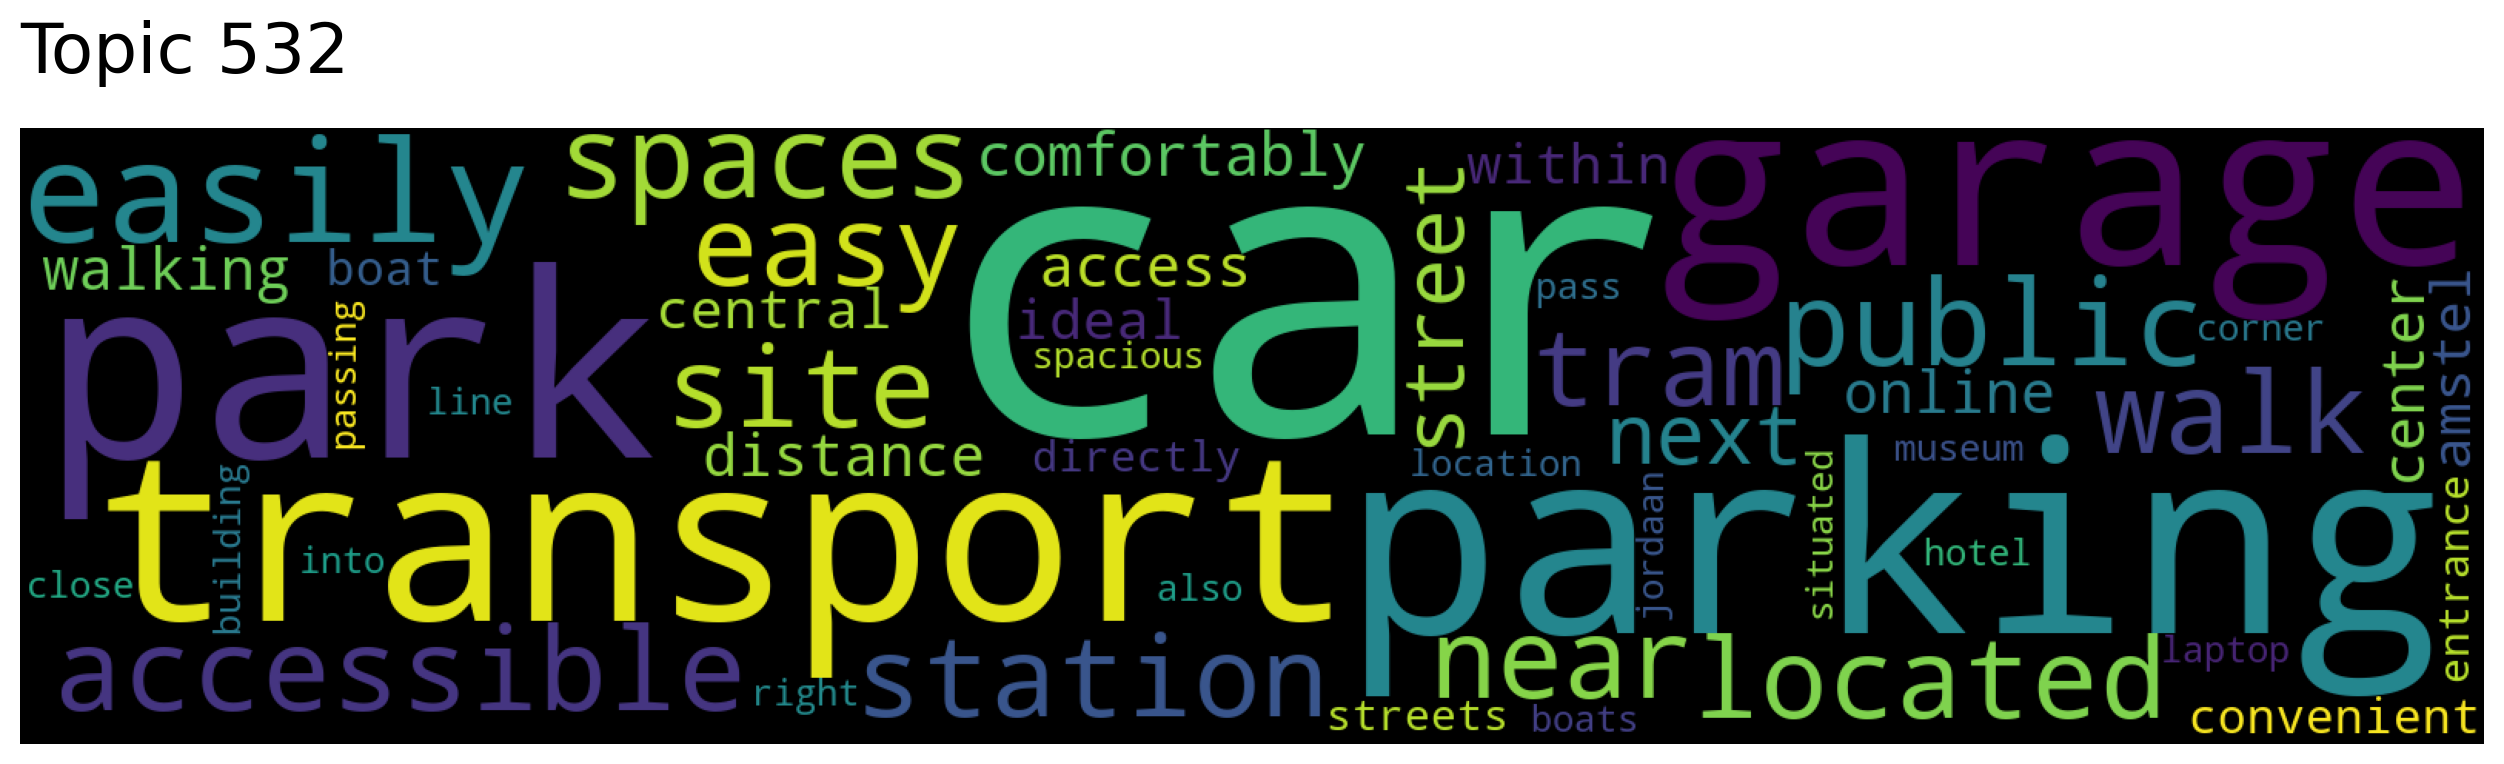

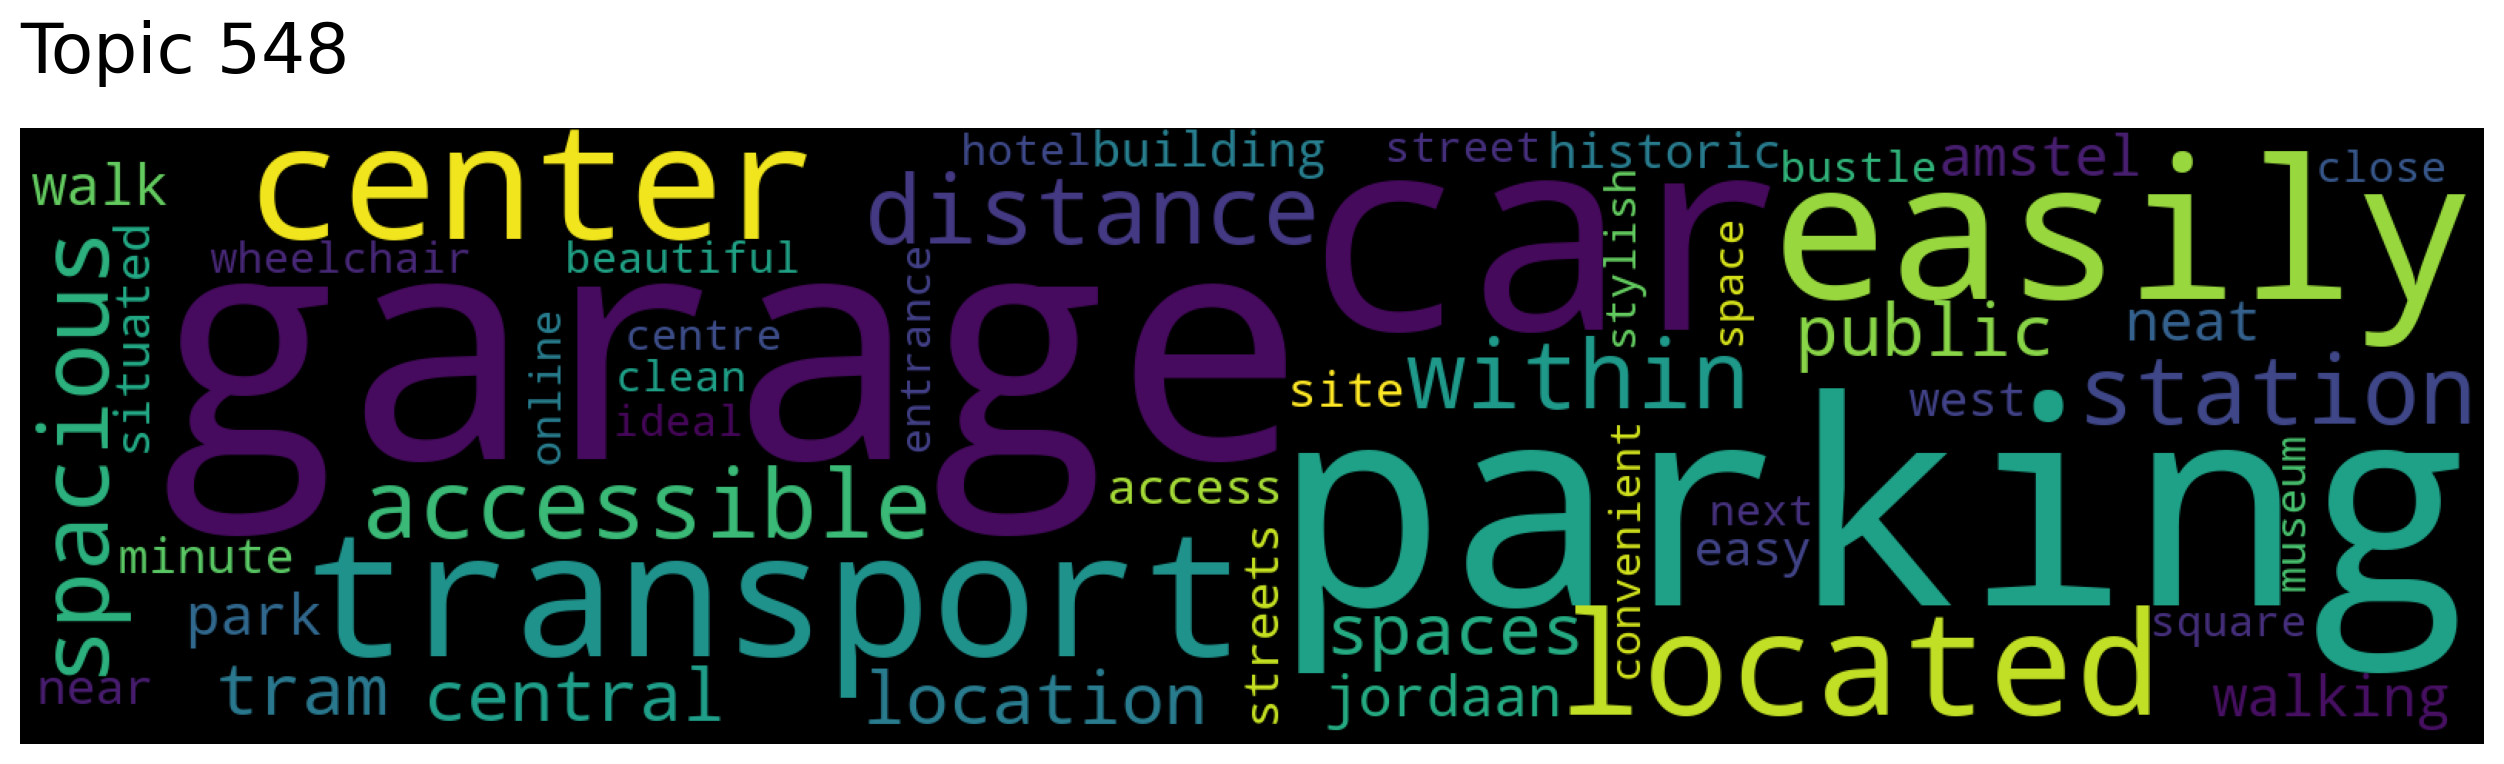

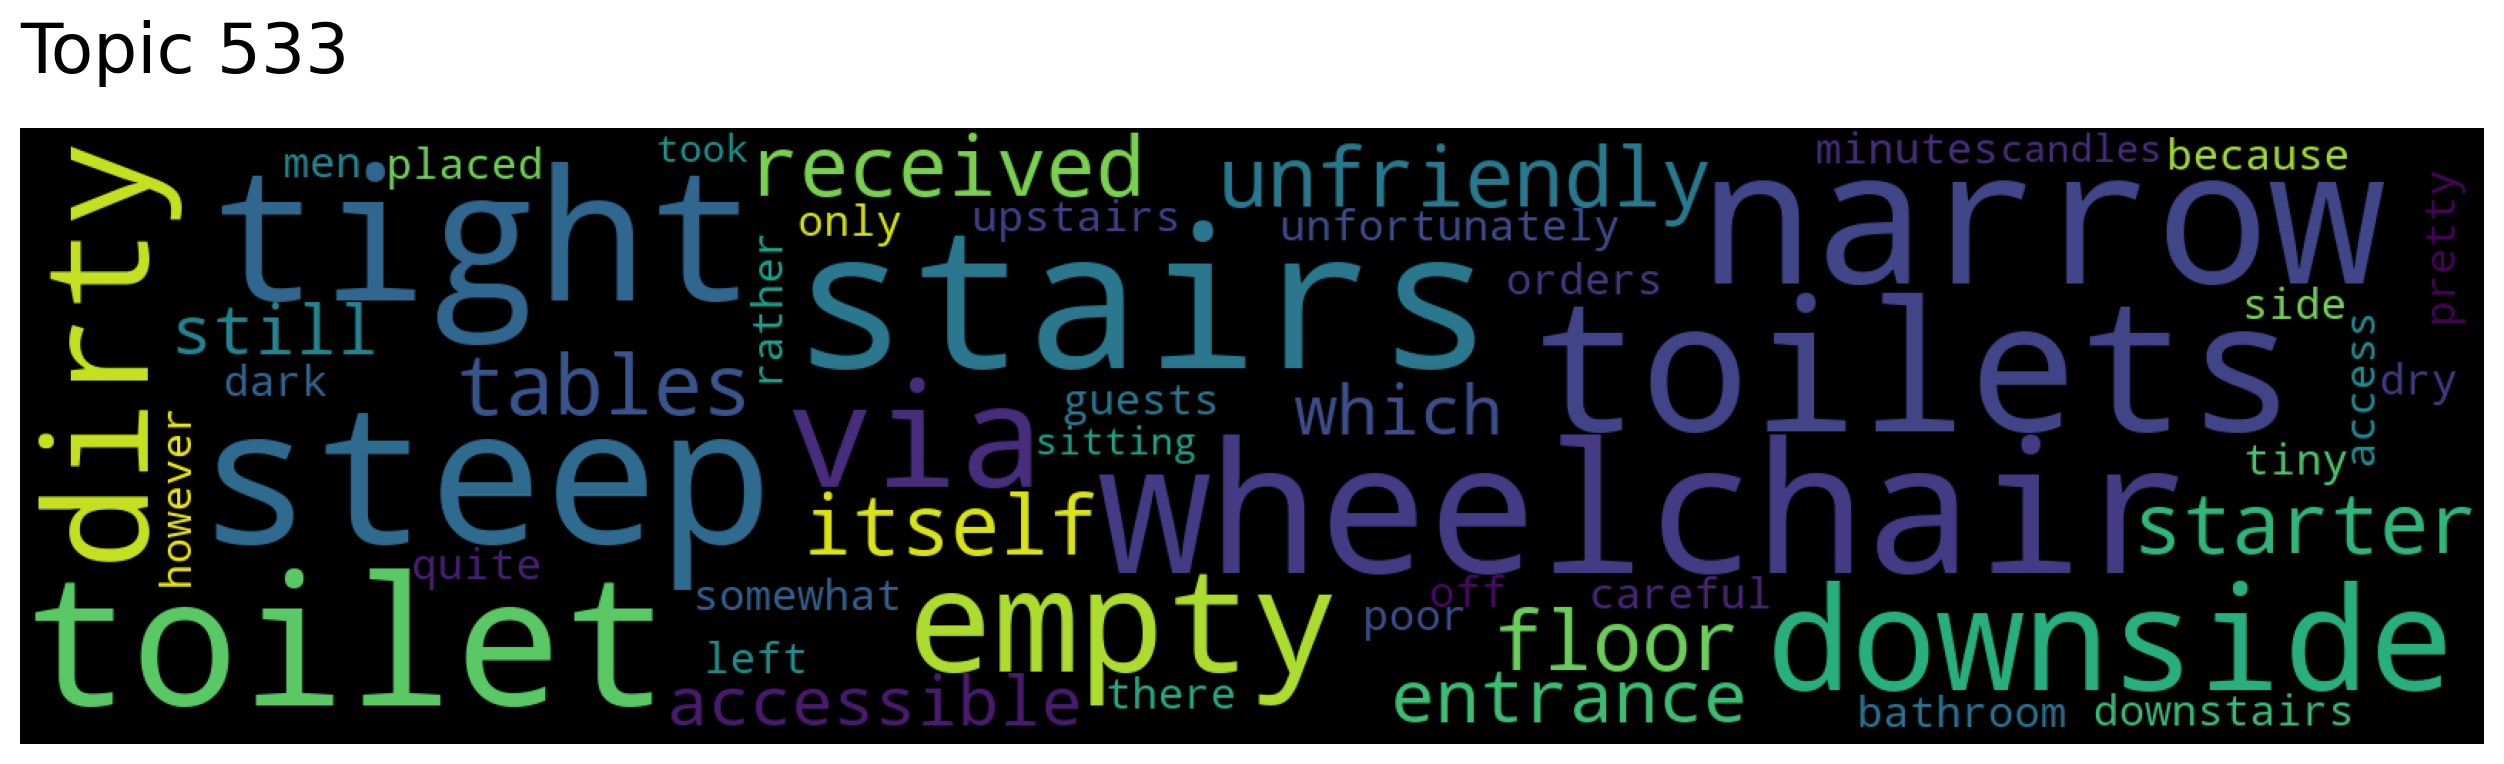

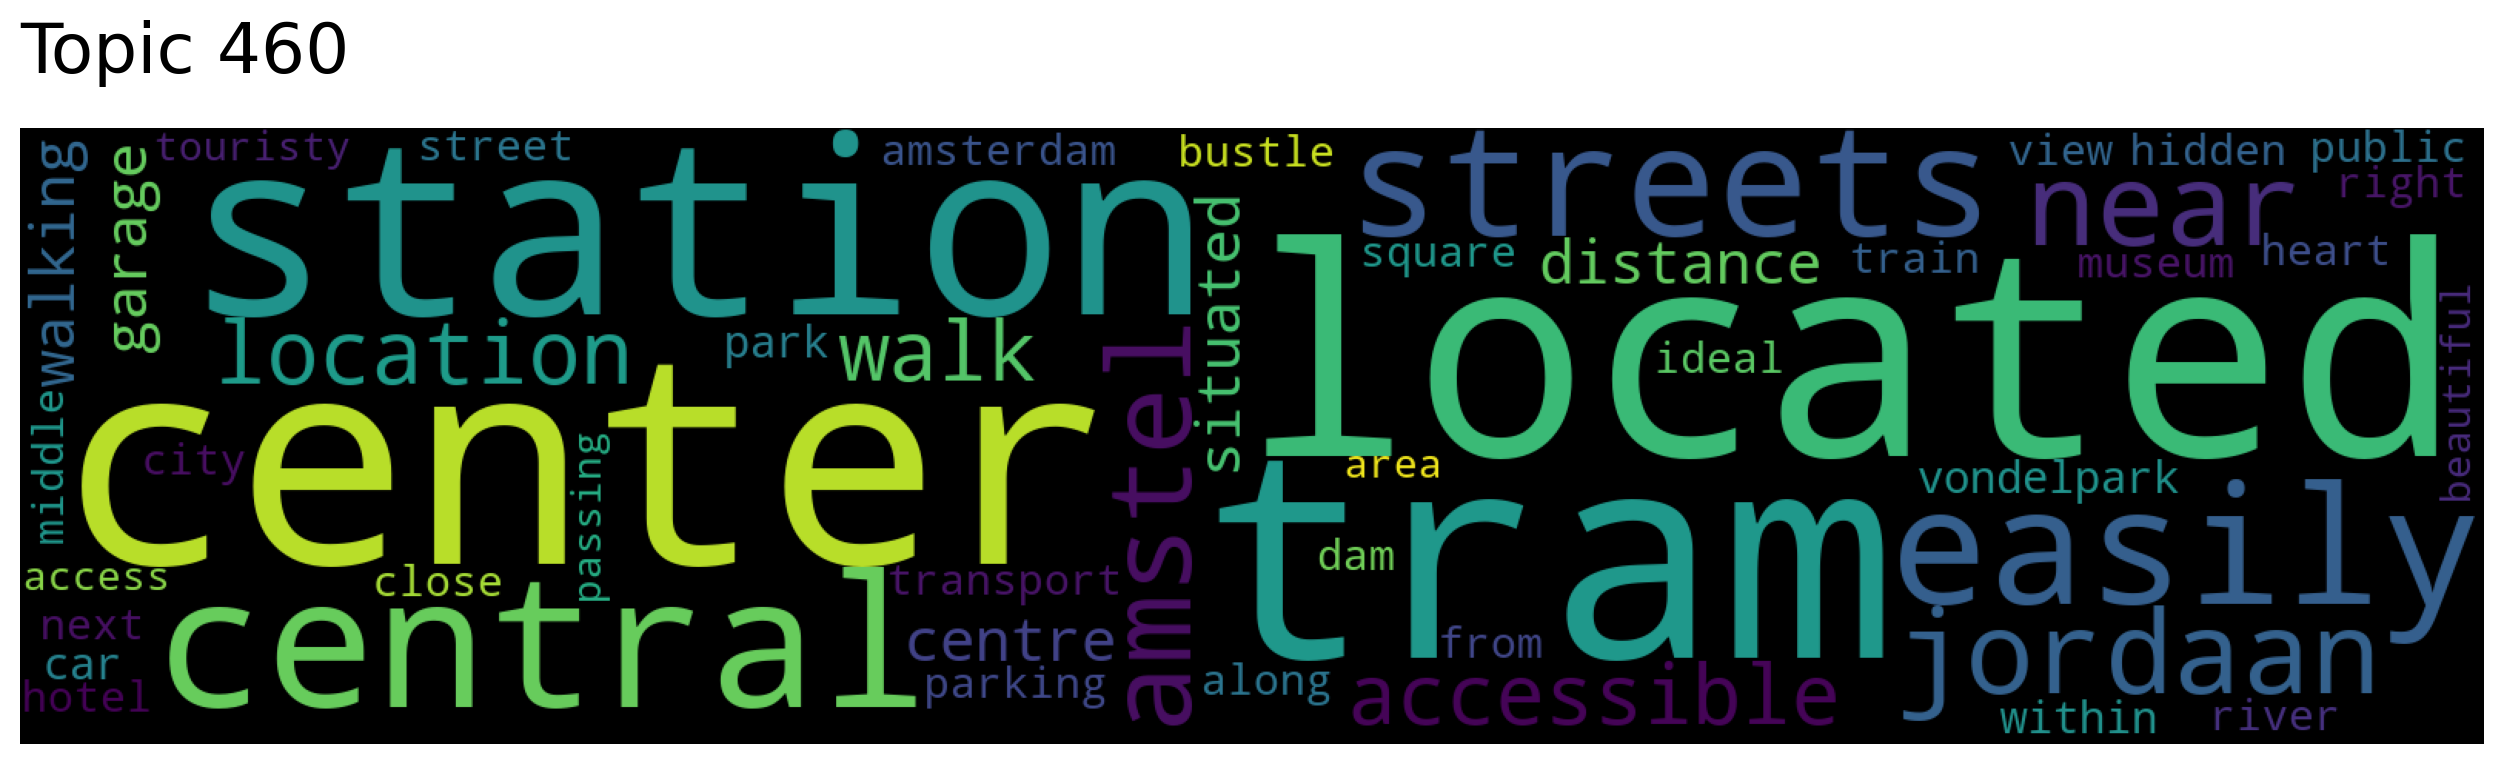

In [50]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["access"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [52]:
print(topic_scores)

[0.44242466 0.43504217 0.4164686  0.39488395 0.39103478]


In [ ]:
relevant_split_google_reviews

In [55]:
3000/len(aspects_patterns)

300.0

In [63]:
count = relevant_split_google_reviews[relevant_split_google_reviews['Sentences'].str.contains('wheelchair', case=False)].shape[0]

In [64]:
print(count)

90


In [67]:
word_counts = {}

for word in aspects_patterns:
    count = relevant_split_google_reviews[relevant_split_google_reviews['Sentences'].str.contains(word, case=False)].shape[0]
    word_counts[word] = count

In [68]:
print(word_counts)

{'width': 5, 'space': 2183, 'entrance': 412, 'Wheelchair': 90, 'Access': 513, 'Staff': 31760, 'Toilets': 546, 'Transport & Parking': 0, 'Overview': 28, 'Noise levels': 1}


In [91]:
selected_rows = pd.DataFrame()
target_count = 199  # Number of rows to select from each group
total_selected_count = 0  # Total count of selected rows

for word, count in word_counts.items():
    if count >= target_count:
        group_rows = relevant_split_google_reviews[relevant_split_google_reviews['Sentences'].str.contains(word, case=False)]
        selected_group_rows = group_rows.sample(target_count, random_state=42)
        selected_rows = pd.concat([selected_rows, selected_group_rows])
        total_selected_count += target_count

    # Break the loop if the desired total count is reached
    if total_selected_count >= 4834:
        break

# Reset the index of the selected rows dataframe
selected_rows = selected_rows.reset_index(drop=True)



In [94]:
# Assuming 'df' is your dataframe with a column 'Relevance' containing 'True' or 'False' values
relevant_rows = split_google_reviews[split_google_reviews['relevant'] == True]
irrelevant_rows = split_google_reviews[split_google_reviews['relevant'] == False]

# Calculate the number of relevant and irrelevant rows to select
num_relevant_rows = int(4839 * 0.6)  # Approximately 60% of the total desired count
num_irrelevant_rows = 4839 - num_relevant_rows

# Randomly sample the desired number of relevant and irrelevant rows
selected_relevant_rows = relevant_rows.sample(num_relevant_rows, random_state=42)
selected_irrelevant_rows = irrelevant_rows.sample(num_irrelevant_rows, random_state=42)

# Concatenate the selected rows
selected_rows = pd.concat([selected_relevant_rows, selected_irrelevant_rows])

# Reset the index of the selected rows dataframe
selected_rows = selected_rows.reset_index(drop=True)

In [95]:
len(selected_rows)

4839

In [97]:
selected_rows.to_excel(home_path+'data/processed/aspect_classification_data/selected_rows.xlsx')